# Proyecto visualización - corte 1.
>  Jeiber Javier Diaz Espitia




In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
import altair as alt
from vega_datasets import data

In [ ]:
pd.set_option('display.max_columns', None) #Mostrar todas las columnas
sns.set(rc={'figure.figsize':(12.7,8.6)})

### Contexto de los datos
Los datos presentados resultan de la medición de la prevalencia de enfermedades mentales en diferentes países. Las enfermedades contempladas resultan de esquizofrenia, transtorno de bipolaridad, desórdenes de alimentación, desórdenes de ansiedad, depresion y desórden mental causado por el consumo de drogas o alcohol.

Estas mediciones son tomadas anualmente, encontrandose registros desde 1990 hasta el 2007.

### Cargue de la información

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_mhd = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Mental health Depression disorder Data.xlsx',
                       dtype={ 
                     'Year': int      # Año, es un factor pero cae en str?
                 })
df_mhd.head()

/usr/local/lib/python3.7/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,Entity,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
0,Afghanistan,AFG,1990,0.160560,0.697779,0.101855,4.828830,1.677082,4.071831,0.672404
1,Afghanistan,AFG,1991,0.160312,0.697961,0.099313,4.829740,1.684746,4.079531,0.671768
2,Afghanistan,AFG,1992,0.160135,0.698107,0.096692,4.831108,1.694334,4.088358,0.670644
3,Afghanistan,AFG,1993,0.160037,0.698257,0.094336,4.830864,1.705320,4.096190,0.669738
4,Afghanistan,AFG,1994,0.160022,0.698469,0.092439,4.829423,1.716069,4.099582,0.669260


## ***Abstracción***

In [ ]:
df_mhd.dtypes    # Tipo de datos

Entity                        object
Code                          object
Year                           int64
Schizophrenia (%)            float64
Bipolar disorder (%)         float64
Eating disorders (%)         float64
Anxiety disorders (%)        float64
Drug use disorders (%)       float64
Depression (%)               float64
Alcohol use disorders (%)    float64
dtype: object

### **¿Qué?**
Se observa un **dataset** de tipo **tabla**, el cual presenta items, atributos y registros temporales que, en este caso, resutan de mediciones anuales.

Entre sus registros evidencian atributos categóricos que resultan ser la entidad (Entity) y codigo (Code). Estos son los registros de los países de las respectivas mediciones, siendo la entidad el nombre del país y el código su abreviatura. 

El año (Year) es un atributo cuantitativo ordenado secuencial.

Finalmente, las variables refrentes a la prevalencia de los diferentes transtornos mentales resutan de atributos cuantitativos.

## Visualización número 1.

In [22]:
df_mhd_countries = df_mhd[(df_mhd['Code'] == "COL") | (df_mhd['Code'] == "USA") | (df_mhd['Code'] == "ITA") | (df_mhd['Code'] == "ESP")]

df_mhd_countries2 = df_mhd_countries[(df_mhd_countries['Year'] == 1990) |
                                     (df_mhd_countries['Year'] == 1995) | 
                                     (df_mhd_countries['Year'] == 2000) | 
                                     (df_mhd_countries['Year'] == 2005) |
                                     (df_mhd_countries['Year'] == 2010) |
                                     (df_mhd_countries['Year'] == 2017)]

bars = alt.Chart(df_mhd_countries2).mark_bar().encode(
    x=alt.X('Depression (%):Q',
            stack = "normalize"),
    y=alt.Y('Year:N'),
    color=alt.Color('Code')
)
text = alt.Chart(df_mhd_countries2).mark_text(dx=-5, dy=0, color='black',size = 8).encode(
    x=alt.X('Depression (%):Q',
            stack='normalize'),
    y=alt.Y('Year:N'),
    detail='Code:N',
    text=alt.Text('Depression (%):Q', format='.1f')
)
chart = bars + text
chart.properties(
    width=600,
    height=150
)

alt.LayerChart(...)

### **¿Por qué?**
> *Descubrir similaridad*.

Determinar similaridad en la prevalencia de la depresión de diferentes países en 6 años específicos.

> *Comparar tendencias*.

Poder observar si el comportamiento en la prevalecia de la depresión a través del tienpo ha sido similar para todos los países o, por el contrario, se encuentran diferencias.

### **¿Cómo?**
Encode: Se **ordenan** los datos y se **separan** por año y código del país.
Posterior al encode se **selecciona** y finalmente se **filtra**

Con todo lo anterior se desarrolla un barplot agrupado. Este no requiere interacción.

## **Marcas y canales usados**
* Marca de línea
* Canal de posición horizontal para la prevalencia de la depresión
* Canal de posición vertical para los años de análisis
* Canal de color para atributo "Código del país".




## Visualización número 2.

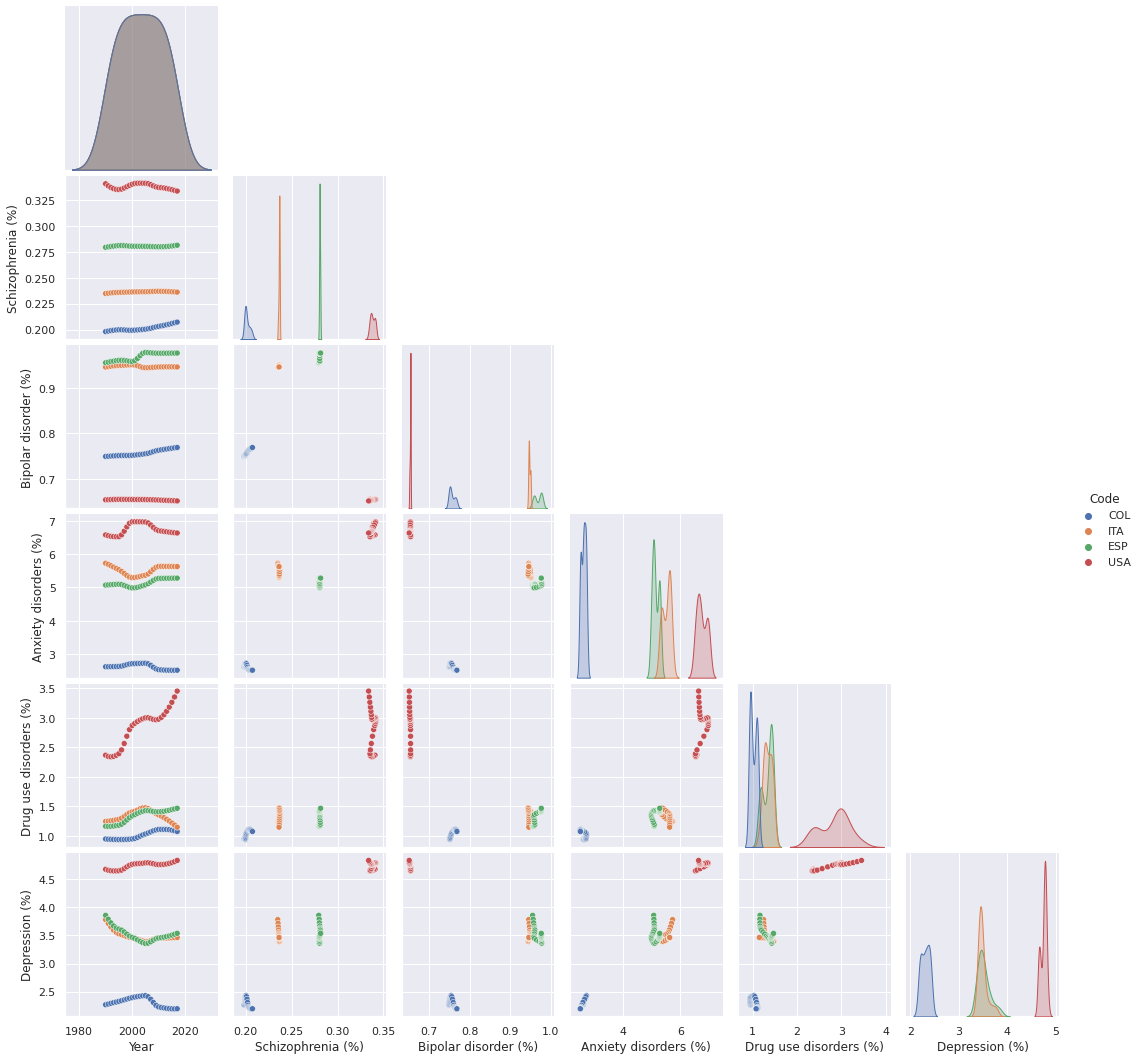

In [29]:
df_mhd_red = df_mhd_countries.iloc[:,[1,2,3,4,6,7,8]]
#df_mhd_red.head
sns.pairplot(df_mhd_red, 
             hue = "Code",
             corner = True)

### **¿Por qué?**
> Comparar tendencias

A través de los años (de 1990 a 2017) como ha sido la prevalencia de dichas enfermedades mentales para los diferentes países analizados, en cuales predomina alguna específica y si estas ha ido en aumento o desceso.

> Descubrir distribuciones

> Identificar asociaciones

¿Existe alguna forma de asociación entre enfermedades mentales? Podría ser el caso de que la prevalencia de una enfermedad mental este asociada a la existencia de otra por ejemplo. 


> Identificar similaridad

Determinar si existen comportamientos similares en las diferentes enfermedades mentales a traves del tiempo para algunos países, y de existir identificar que paises tienen estas similitudes, y quizá indagar el por que pueda presentarse esto.

### **¿Cómo?**
Encode: Se **ordenan** los datos y se **separan** por año y código del país.
Posterior al encode se **selecciona** y finalmente se **filtra**.

## **Marcas y canales usados**
Scatterplot
* Marca de puntos para las diferentes observaciones
* Canal de posición horizontal para la primer enfermedad o desorden mental
* Canal de posición vertical para la segunda enfermedad o desorden mental
* Canal de color para diferenciar el país de análisis

Density plots
* Marca de area para la densidad de la enfermedad o desorden mental
* Canal de posición vertical y horizontal
* Canal de color para diferenciar el país de análisis.